<a href="https://colab.research.google.com/github/harrietfiagbor/undergraduate_thesis/blob/main/Disease_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disease Prediction using Predictive Modelling

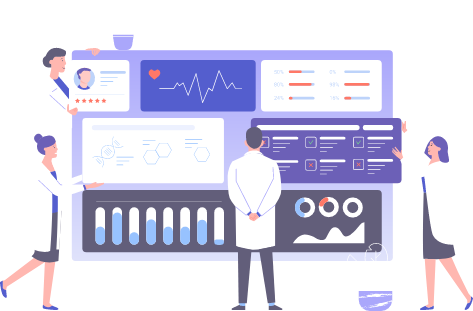

The dataset is from https://www.kaggle.com/datasets/kaushil268disease-prediction-using-machine-learning (as at February 10, 2022).

The data contains 132 symptoms (features) and 41 different types of diseases (target variable).

In [39]:
# import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the datasets from drive

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# train data
train_data = pd.read_csv('drive/MyDrive/Research project/Dataset/Training.csv')

# test data 
test_data = pd.read_csv('drive/MyDrive/Research project/Dataset/Testing.csv')

Checking the shape of the train and test data

In [42]:
train_data.shape

(4920, 134)

In [43]:
test_data.shape

(42, 133)

checking the head of the data

In [44]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


### Data Preprocessing

Info on data

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


Identifying Null values

In [46]:
# identify null values
null_columns = train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()

Unnamed: 133    4920
dtype: int64

Dropping the null value column

In [47]:
# drop 'Unnamed: 133'
train_data.drop('Unnamed: 133', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


Viewing the symptoms of the data

In [48]:
sorted(train_data.columns.tolist()[:-1])

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'fluid_overload.1',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itch

Seems like we have 'fluid_overload' and 'fluid_overload.1'
Let us look at what prognosis they result in

In [49]:
train_data[train_data['fluid_overload'] == 1].prognosis.unique()

array([], dtype=object)

In [50]:
train_data[train_data['fluid_overload.1'] == 1].prognosis.unique()

array(['Alcoholic hepatitis'], dtype=object)

Seems like fluid_overload is not much of an indicator by itself but fluid_overload.1 seems like an obvious indicator of alcoholic hepatitis.
Matter of fact, let us take a look at all the various symptoms and their prognosis to see which symptoms is a very telling sign

In [51]:
data = {'Symptoms': [], 'Prognosis': [], 'length': []}
table = pd.DataFrame(data)
table = table.astype({"Symptoms": str, "Prognosis": object, 'length': int})
i = 0

for symp in sorted(train_data.columns.tolist()[:-1]):
    prognosis = train_data[train_data[symp] == 1].prognosis.unique().tolist()
    table = table.append({'Symptoms': symp}, {'Prognosis': prognosis}, {'length':len(prognosis)}) 
    table.at[i,'Prognosis'] = prognosis
    table.at[i, 'length'] = len(prognosis)
    i += 1
    
table.sort_values(by='length', ascending=False).head(10)

,Symptoms,Prognosis,length
41,fatigue,"[Diabetes , Bronchial Asthma, Jaundice, Chicke...",17.0
122,vomiting,"[GERD, Chronic cholestasis, Peptic ulcer disea...",17.0
46,high_fever,"[AIDS, Bronchial Asthma, Jaundice, Malaria, Ch...",12.0
72,nausea,"[Chronic cholestasis, Malaria, Dengue, Typhoid...",10.0
61,loss_of_appetite,"[Chronic cholestasis, Peptic ulcer diseae, Chi...",10.0
45,headache,"[Hypertension , Migraine, Paralysis (brain hem...",10.0
0,abdominal_pain,"[Chronic cholestasis, Peptic ulcer diseae, Jau...",9.0
131,yellowish_skin,"[Chronic cholestasis, Jaundice, hepatitis A, H...",8.0
130,yellowing_of_eyes,"[Chronic cholestasis, hepatitis A, Hepatitis B...",7.0
101,skin_rash,"[Fungal infection, Drug Reaction, Chicken pox,...",7.0


So, fatigue and vomiting are the two most common and most generic symptoms in this dataset and probably won't be an unique/significant predictor for an illness
What are the most telling symptom then?

In [52]:
table.sort_values(by='length', ascending=True).head(10)

,Symptoms,Prognosis,length
42,fluid_overload,[],0.0
126,weight_gain,[Hypothyroidism],1.0
87,pus_filled_pimples,[Acne],1.0
86,puffy_face_and_eyes,[Hypothyroidism],1.0
85,prominent_veins_on_calf,[Varicose veins],1.0
84,polyuria,[Diabetes ],1.0
82,patches_in_throat,[AIDS],1.0
81,passage_of_gases,[Peptic ulcer diseae],1.0
80,palpitations,[Hypoglycemia],1.0
78,pain_in_anal_region,[Dimorphic hemmorhoids(piles)],1.0


As observed above, fluid_overload does seem to be a problematic symptom for our dataset. Apart from that, there are a great number of very telling symptoms such as patches_in_throat, with the prognosis being AIDS.
However, I do want wish to acknowledge a limitation here. This dataset is not a very large dataset and the prognosis is also pretty limited in diversity (41). Therefore, our model might not have much room to maneuver when it comes to finding relations between different symptoms to come up with a solid prognosis.

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


The training dataset contains 4920 rows of records and 133 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 132 quantitative discrete binary. The memory space usage is at least 5 MBs.

The test dataset contains 42 rows of records and 133 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 132 quantitative discrete binary. The memory space usage is at least 43.8 KBs.

Data pre-processing is now complete.

### Data Analysis

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy in diagosing diseases.

Taking a closer look at the target class labels, as well as their frequency of occurences :

In [54]:
# list and count the target class label names and their frequency
from collections import Counter
count = Counter(train_data['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

Checking if the data is balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


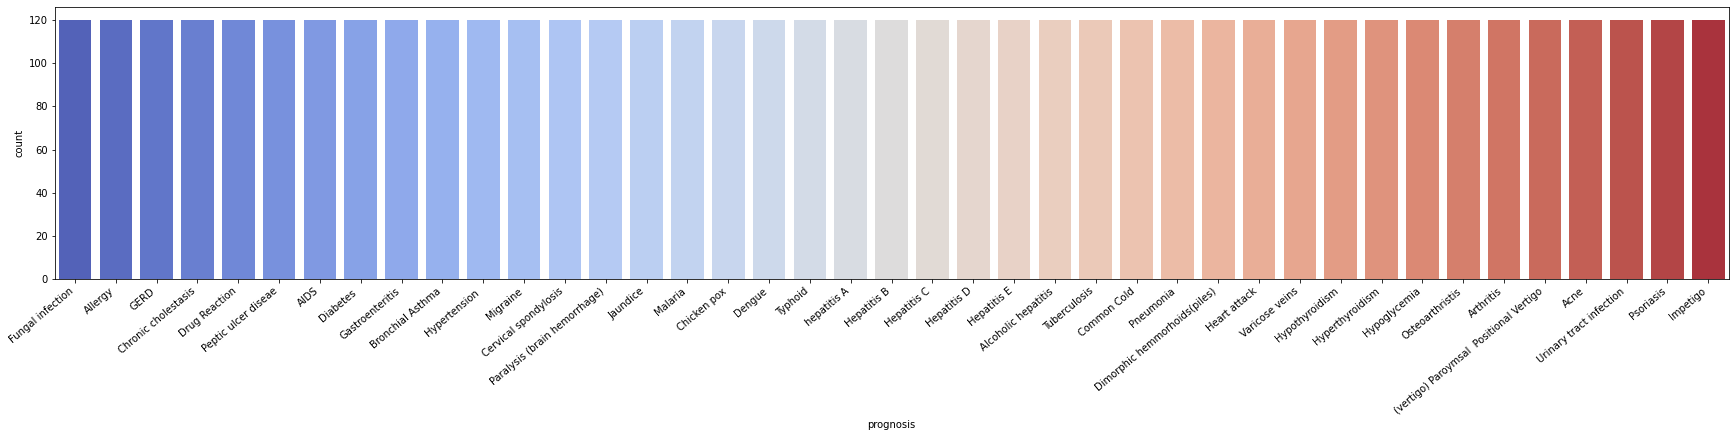

In [55]:
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(train_data['prognosis'], palette = 'coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values and thus almost perfect descriptions of each other. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

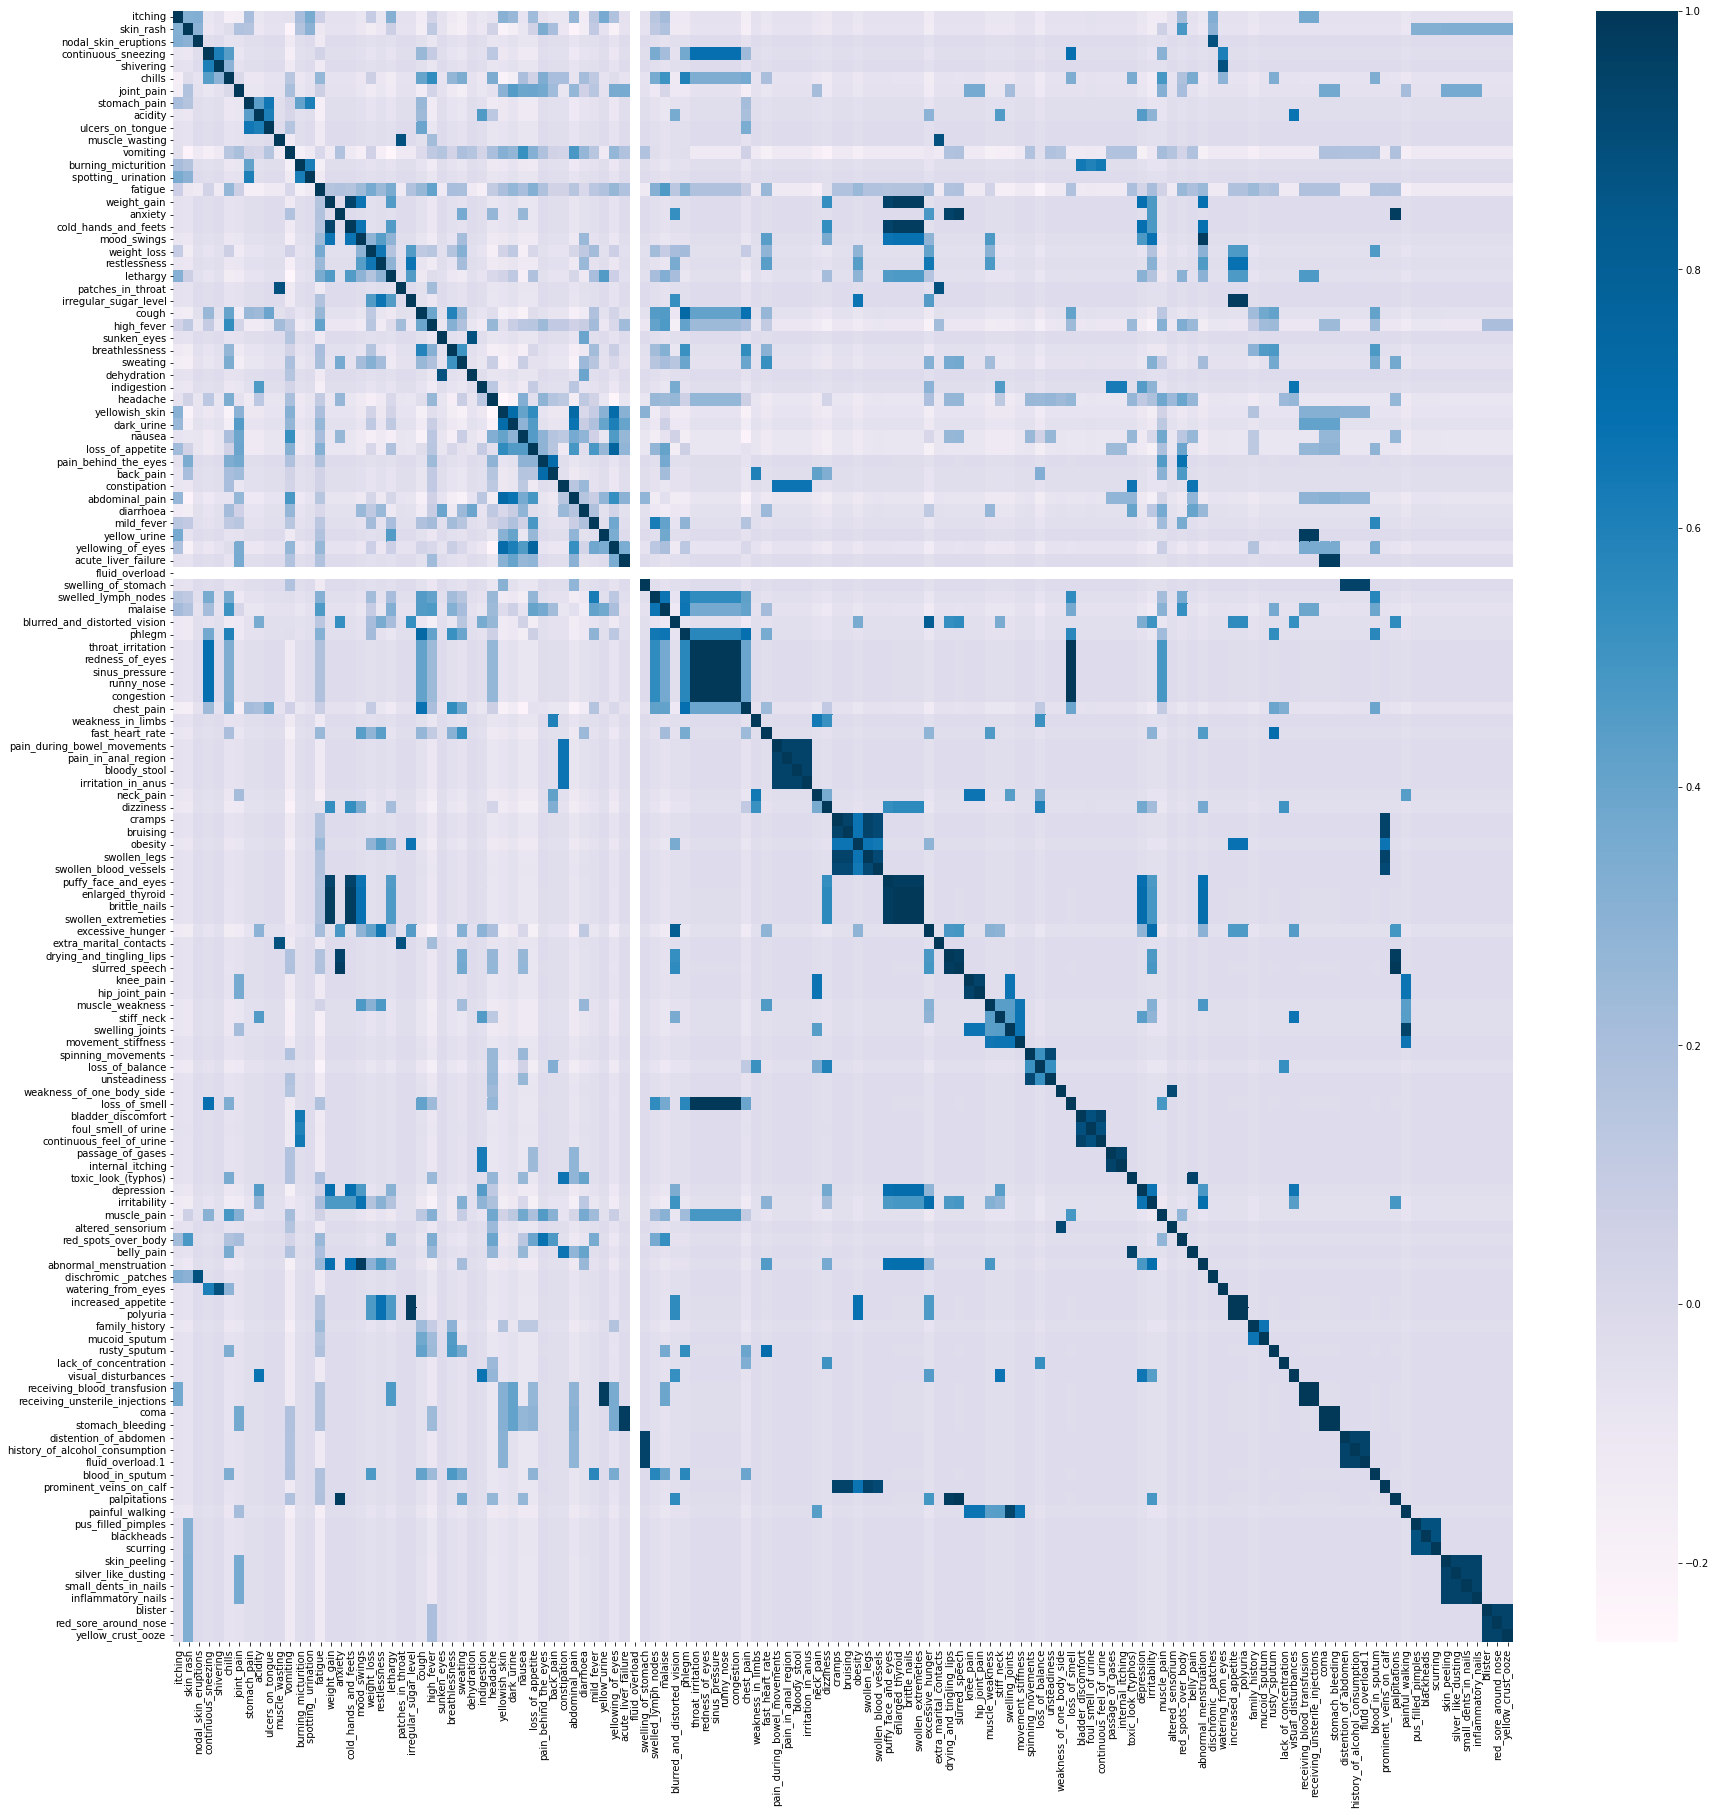

In [56]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(train_data.corr(), cmap = 'PuBu', annot = False)
plt.show()

### Modelling

In [57]:
# classify and model the data using Multilayer Perceptron (MLP) Neural Network, Decision Tree (DT), and Random Forest (RF)
    # machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import math

# split dataset into attributes and labels
X_train = train_data.iloc[:, :-1].values # the training attributes
y_train = train_data.iloc[:, 132].values # the training labels
X_test = test_data.iloc[:, :-1].values # the testing attributes
y_test = test_data.iloc[:, 132].values # the testing labels

In [58]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [59]:
# using RF classifier
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [60]:
# using MLP classifier
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

In [61]:
# using NB classifier
classifierNB= MultinomialNB()
classifierNB.fit(X_train, y_train)

MultinomialNB()

**Model Evaluation**
The model performance is evaluated and validated by using the test set of 42 records to predict the classifications of these new unbiased data that were not used to train the model. The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. The supports are 1 instance for each target class label of prognosis. This process ensures that the models are useful by being generalisable even when the specific training data used is extended to include new test data, or in technical terms ‘avoid over fitting’.

In [62]:
# use the chosen three models to make predictions on test data
y_predMLP = classifierMLP.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)
y_predNB = classifierNB.predict(X_test)

In [63]:
# for MLP model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [64]:
# for RF model
# using confusion matrix
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [65]:
# for DT model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [66]:
# for NB model
# using confusion matrix
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test, y_predNB))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierNB.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predNB))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

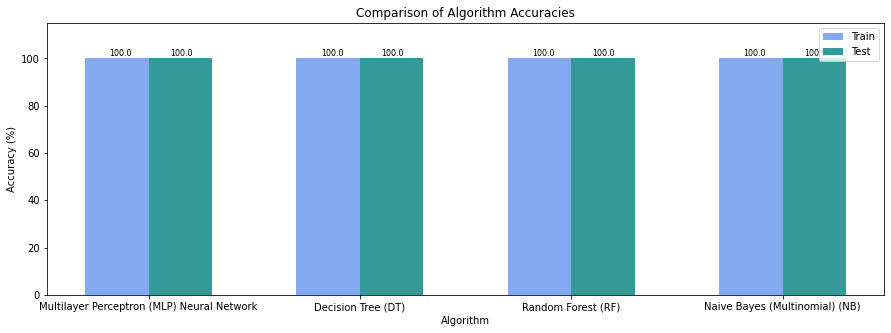

In [68]:
# data to plot
n_groups = 4
algorithms = ('Multilayer Perceptron (MLP) Neural Network', 'Decision Tree (DT)', 'Random Forest (RF)', 'Naive Bayes (Multinomial) (NB)')
train_accuracy = (accuracy_score(y_train, classifierMLP.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierRF.predict(X_train))*100,
                  accuracy_score(y_train, classifierNB.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predMLP)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predRF)*100,
                 accuracy_score(y_test, y_predNB)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

**Model Interpretation**
The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.

Feature engineering will involve feature selection based on higher feature importance towards the chosen model. This yields a subset of features from the original set to better represent the data, thus enabling the machine learning algorithm to train faster and reducing the model's computational complexity and cost. The model can also be easier to interpret and become more comprehendible to humans, and in some cases achive improved accuracy when the right subset is chosen.



In [69]:
# identify the important features in DT
imp = classifierDT.feature_importances_
imp

array([0.02984509, 0.05380291, 0.        , 0.        , 0.00873855,
       0.01198582, 0.01738146, 0.        , 0.00126828, 0.        ,
       0.00045525, 0.09395722, 0.00335372, 0.00626677, 0.15787755,
       0.        , 0.        , 0.        , 0.        , 0.00126828,
       0.        , 0.        , 0.        , 0.        , 0.0074519 ,
       0.06000399, 0.00082164, 0.00508929, 0.00108233, 0.        ,
       0.00314548, 0.03385946, 0.02054279, 0.00108233, 0.03717948,
       0.06604646, 0.00948103, 0.00130382, 0.00082164, 0.02301752,
       0.01024928, 0.00966663, 0.        , 0.01920472, 0.00045525,
       0.        , 0.        , 0.        , 0.02833524, 0.00045525,
       0.00045525, 0.        , 0.        , 0.        , 0.00045525,
       0.0081945 , 0.04822218, 0.        , 0.        , 0.        ,
       0.        , 0.0121364 , 0.        , 0.02705534, 0.00088777,
       0.        , 0.        , 0.00188551, 0.00398362, 0.00045525,
       0.        , 0.        , 0.0009105 , 0.        , 0.     

In [72]:
# selecting one of the model and saving it

# loading dependency
import joblib
# saving our model # model - model , filename-model_jlib
joblib.dump(classifierNB , 'trained_model')

['trained_model']